<a href="https://colab.research.google.com/github/Manojkumar192002/machine_learning/blob/main/Gini_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [34]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [35]:
col = list(df.columns)

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for m in col:
  df[m]=labelencoder.fit_transform(df[m])
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,418,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1312,0,101,1,0,1,2,1,1360,418,2,0
5106,3100,0,102,0,0,1,3,1,3030,273,2,0
5107,1396,0,56,0,0,1,3,0,1314,179,2,0
5108,2601,1,72,0,0,1,2,0,3363,129,1,0


In [37]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,239,1,1
1,3610,0,82,0,0,1,3,0,3588,418,2,1
2,2151,1,101,0,1,1,2,0,2483,198,2,1
3,4226,0,70,0,0,1,2,1,3385,217,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


In [38]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,1312,0,101,1,0,1,2,1,1360,418,2,0
5106,3100,0,102,0,0,1,3,1,3030,273,2,0
5107,1396,0,56,0,0,1,3,0,1314,179,2,0
5108,2601,1,72,0,0,1,2,0,3363,129,1,0
5109,3089,0,65,0,0,1,0,1,1454,135,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 5110 non-null   int64
 1   gender             5110 non-null   int64
 2   age                5110 non-null   int64
 3   hypertension       5110 non-null   int64
 4   heart_disease      5110 non-null   int64
 5   ever_married       5110 non-null   int64
 6   work_type          5110 non-null   int64
 7   Residence_type     5110 non-null   int64
 8   avg_glucose_level  5110 non-null   int64
 9   bmi                5110 non-null   int64
 10  smoking_status     5110 non-null   int64
 11  stroke             5110 non-null   int64
dtypes: int64(12)
memory usage: 479.2 KB


In [40]:
df.shape

(5110, 12)

In [41]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,2554.500000,0.414286,64.006262,0.097456,0.054012,0.656164,2.167710,0.508023,1883.219961,171.194521,1.376908,0.048728
std,1475.274268,0.493044,23.083973,0.296607,0.226063,0.475034,1.090293,0.499985,1104.935189,88.961724,1.071534,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1277.250000,0.000000,46.000000,0.000000,0.000000,0.000000,2.000000,0.000000,969.250000,111.000000,0.000000,0.000000
50%,2554.500000,0.000000,66.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1811.500000,157.000000,2.000000,0.000000
75%,3831.750000,1.000000,82.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2786.000000,213.000000,2.000000,0.000000
max,5109.000000,2.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3978.000000,418.000000,3.000000,1.000000


In [42]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [43]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [44]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


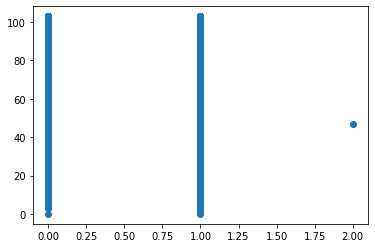

In [45]:
plt.scatter(df.gender,df.age)
plt.show()

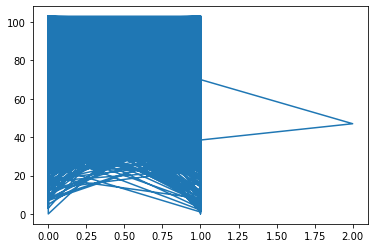

In [46]:
plt.plot(df.gender,df.age)
plt.show()

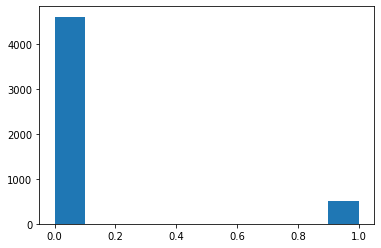

In [47]:
plt.hist(df.hypertension)
plt.show()

In [48]:
x=df.drop('heart_disease',axis=1)
y=df['heart_disease']

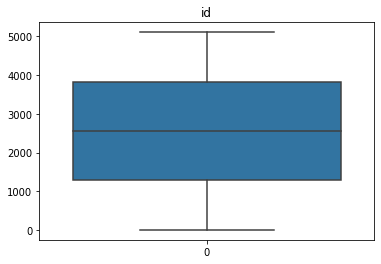

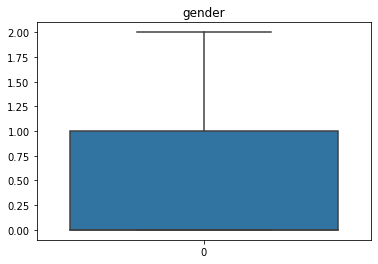

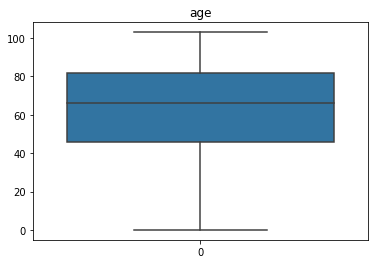

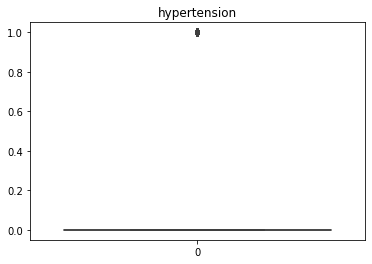

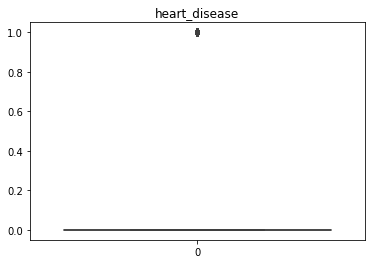

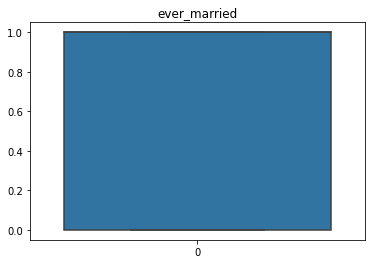

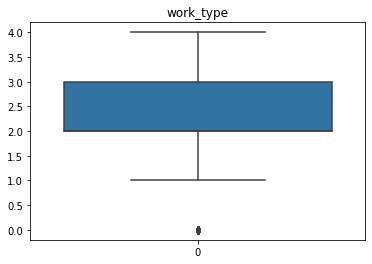

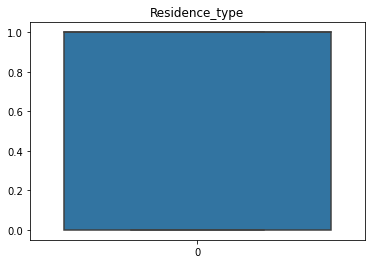

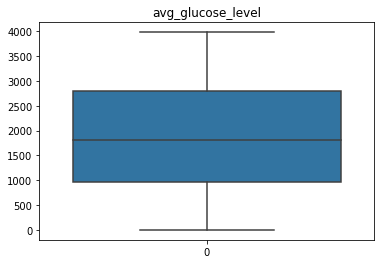

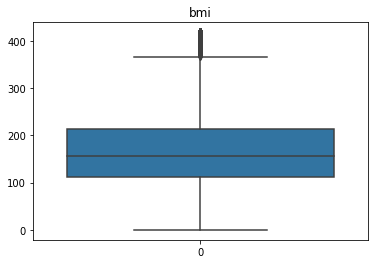

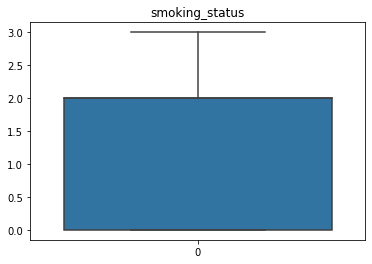

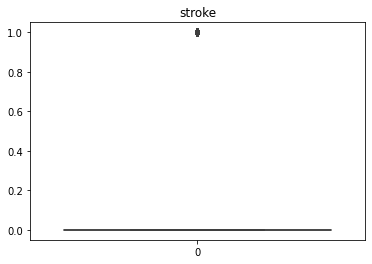

In [49]:
for j in col:
  sns.boxplot(df[j])
  plt.title(j)
  plt.show()

In [50]:
x.head(3)

,id,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,2,1,3850,239,1,1
1,3610,0,82,0,1,3,0,3588,418,2,1
2,2151,1,101,0,1,2,0,2483,198,2,1


In [51]:
y.head(3)

0    1
1    0
2    1
Name: heart_disease, dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=0)


In [53]:
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

In [54]:
clf=DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
y_pred=clf.predict(x_test)

In [56]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2275,  150],
       [ 110,   20]])

In [57]:
import sklearn

In [58]:
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test,y_pred)

0.898238747553816

In [59]:
import graphviz

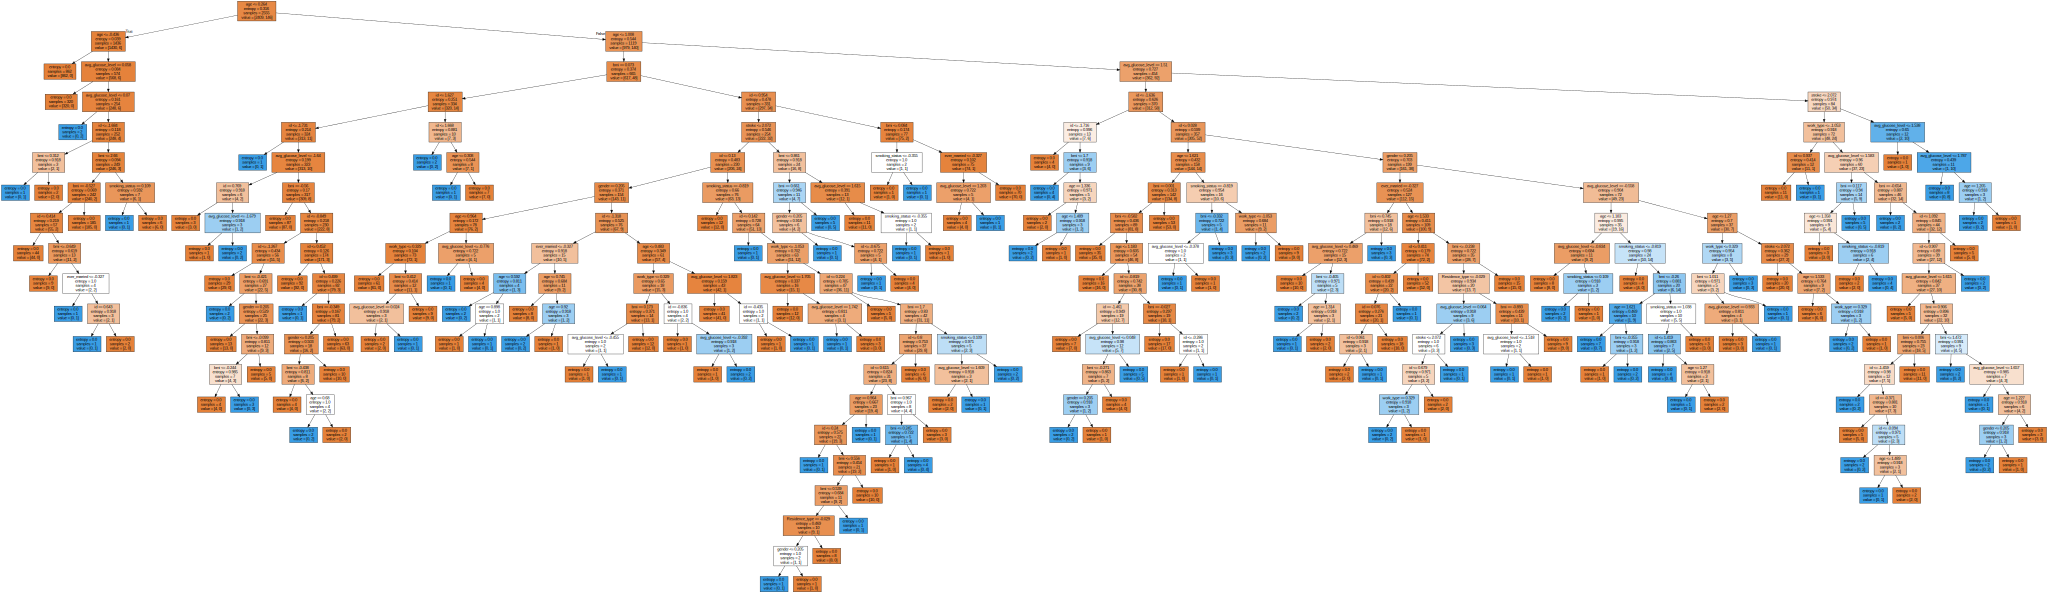

In [60]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled=True,))